In [1]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp
import spikeinterface.widgets as sw
import spikeinterface as si
from pathlib import Path
import time
import matplotlib.pyplot as plt

c:\Users\Windows\.conda\envs\ms10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nwb_file = r"D:\cl\rf_reconstruction\freelymoving\CnL22_20241218_130546.rec\CnL22_20241218_130546.recsh0.nwb"
recording = se.NwbRecordingExtractor(nwb_file)
recording = sp.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording = sp.common_reference(recording, reference="global", operator="median")
recording

CommonReferenceRecording: 32 channels - 30.0kHz - 1 segments - 74,666,980 samples 
                          2,488.90s (41.48 minutes) - int16 dtype - 4.45 GiB

In [4]:
sorting_results_folder =  Path(r'\\10.129.151.108\xieluanlabs\xl_cl\code\sortout\CnL22\20241218_130546\0\sorting_results_20250314_1707')
analyzer_folder =sorting_results_folder / 'sorting_analyzer'

sorting_analyzer = si.load_sorting_analyzer(analyzer_folder)
sorting_analyzer

# import spikeinterface.exporters as sexp
# sexp.export_to_phy( sorting_analyzer, output_folder=out_folder / 'sorting_results_20241220_1553' / 'phy')

SortingAnalyzer: 32 channels - 21 units - 1 segments - binary_folder - sparse - has recording
Loaded 2 extensions: random_spikes, waveforms

In [5]:
sorting = sorting_analyzer.sorting
sorting

NumpySorting: 21 units - 1 segments - 30.0kHz

In [6]:
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
from spikeinterface import extract_waveforms

# Suppose you already have your recording and sorting extractors
# For example:
# recording = se.SomeRecordingExtractor('path/to/recording')
# sorting = se.SomeSortingExtractor('path/to/sorting')

# Step 1: Extract waveforms for the sorting units from the recording

wave_forms_folder = sorting_results_folder / 'waveforms'
if wave_forms_folder .exists():
    #delete the folder
    import shutil
    shutil.rmtree(wave_forms_folder)
we = extract_waveforms(
    recording,
    sorting, 
    folder= sorting_results_folder / 'waveforms',
)

import spikeinterface.widgets as sw

# Get a list of unit IDs from the sorting extractor within the waveform extractor




####
# extract_waveforms() and WaveformExtractor() have been replaced by the `SortingAnalyzer` since version 0.101.0.
# You should use `spikeinterface.create_sorting_analyzer()` instead.
# `spikeinterface.extract_waveforms()` is now mocking the old behavior for backwards compatibility only,
# and will be removed with version 0.103.0
####


c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\job_tools.py:103: UserWarning: `n_jobs` is not set so parallel processing is disabled! To speed up computations, it is recommended to set n_jobs either globally (with the `spikeinterface.set_global_job_kwargs()` function) or locally (with the `n_jobs` argument). Use `spikeinterface.set_global_job_kwargs?` for more information about job_kwargs.
  warnings.warn(
c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\baserecordingsnippets.py:264: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
  warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")
estimate_sparsity: 100%|##########| 2489/2489 [00:09<00:00, 274.58it/s]
c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\baserecordingsnippets.py:264: UserWarning: There is no Probe attached to this recording. Creating a dummy one with c

export to phy

c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\job_tools.py:103: UserWarning: `n_jobs` is not set so parallel processing is disabled! To speed up computations, it is recommended to set n_jobs either globally (with the `spikeinterface.set_global_job_kwargs()` function) or locally (with the `n_jobs` argument). Use `spikeinterface.set_global_job_kwargs?` for more information about job_kwargs.
  warnings.warn(
extract PCs: 100%|##########| 2489/2489 [05:11<00:00,  7.99it/s]


Run:
phy template-gui  \\10.129.151.108\xieluanlabs\xl_cl\code\sortout\CnL22\20241218_130546\2\sorting_results_20241220_1553\phy\params.py


In [23]:
# sorting_analyzer.compute("random_spikes")
# sorting_analyzer.compute("waveforms", ms_before=1.0, ms_after=2.0)
# sorting_analyzer.compute(["templates", "quality_metrics","noise_levels", "amplitude_scalings", "template_metrics", "spike_amplitudes"])

In [24]:
sorting = sorting_analyzer.sorting
sorting

NumpySorting: 19 units - 1 segments - 30.0kHz

In [8]:
sorting_analyzer.compute("templates", ms_before=2.0, ms_after=2.0)

c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\job_tools.py:103: UserWarning: `n_jobs` is not set so parallel processing is disabled! To speed up computations, it is recommended to set n_jobs either globally (with the `spikeinterface.set_global_job_kwargs()` function) or locally (with the `n_jobs` argument). Use `spikeinterface.set_global_job_kwargs?` for more information about job_kwargs.
  warnings.warn(


In [11]:
sorting_analyzer.compute("spike_amplitudes")

c:\Users\Windows\.conda\envs\ms10\lib\site-packages\spikeinterface\core\job_tools.py:103: UserWarning: `n_jobs` is not set so parallel processing is disabled! To speed up computations, it is recommended to set n_jobs either globally (with the `spikeinterface.set_global_job_kwargs()` function) or locally (with the `n_jobs` argument). Use `spikeinterface.set_global_job_kwargs?` for more information about job_kwargs.
  warnings.warn(
spike_amplitudes: 100%|##########| 2489/2489 [01:08<00:00, 36.42it/s]


In [12]:
for unit_id in sorting.get_unit_ids():
    sw.plot_unit_summary(sorting_analyzer, unit_id=unit_id)
    plt.savefig(sorting_results_folder / f'unit_summary_{unit_id}.png')
    plt.close()

In [ ]:
for unit_id in sorting.unit_ids:
    sw.plot_unit_templates(sorting_analyzer, unit_ids=[unit_id])
    plt.savefig(sort_out_folder / f'unit_templates_{unit_id}.png')

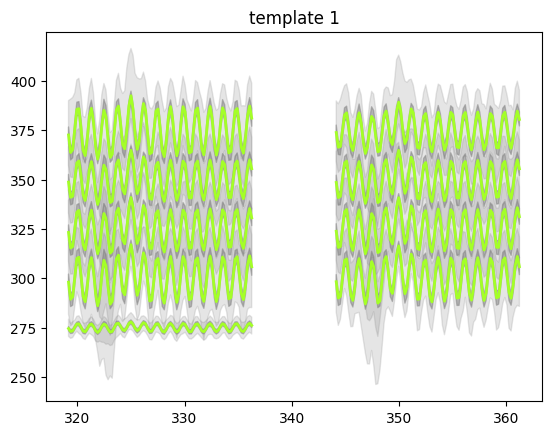

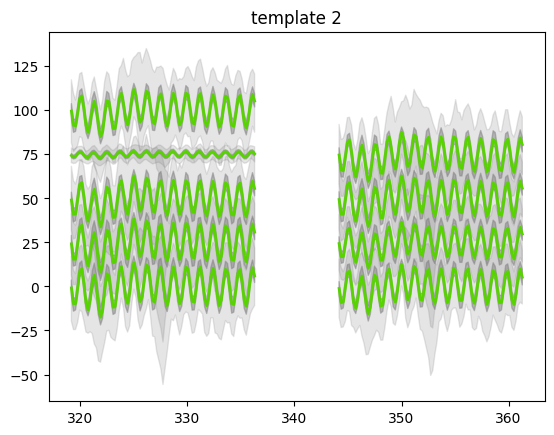

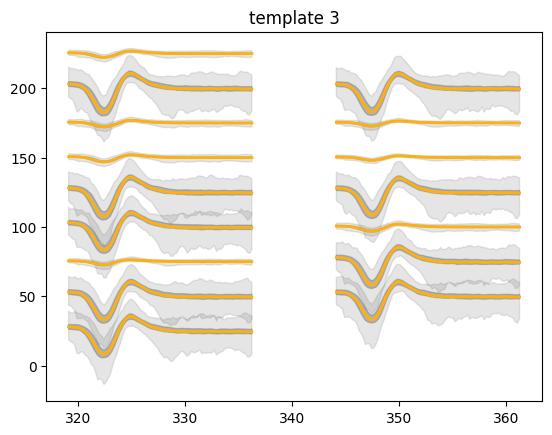

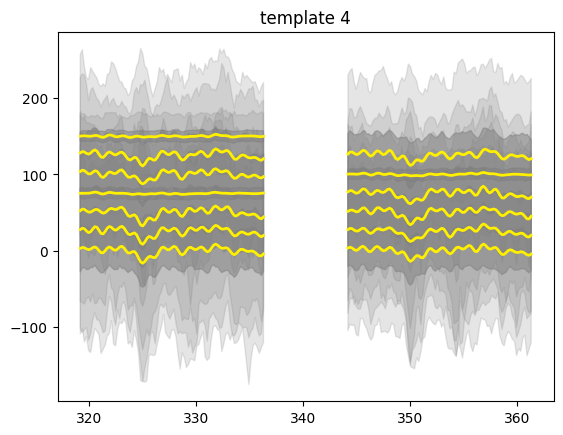